Let us assume that the equation we are trying to model is:

    y = 2x + 1

i.e.

    alpha = 2
    beta = 1
    
then, 

    y = alpha * x + beta

In [1]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Build a Toy Dataset
x = [i for i in range(11)]
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
# Conver to numpy array
x_train = np.array(x, dtype=np.float32)
x_train

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
      dtype=float32)

In [4]:
x_train.shape

(11,)

In [5]:
# Reshape array to be a 2D array
x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [6]:
# y values
y = [2*i + 1 for i in x]
y

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [7]:
# Convert to numpy and reshape
y_train = np.array(y, dtype=np.float32).reshape(-1,1)
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [8]:
y_train.shape

(11, 1)

### Create Linear Regression Model

In [9]:
# Import Dependencies
import torch
import torch.nn as nn
from torch.autograd import Variable

In [10]:
# Linear Regression Class
class LinearRegressionModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        # define super to inherit from nn.Module
        super(LinearRegressionModel, self).__init__()
        # define linear function where input_dim: "x" and output_dim: "y"
        self.linear = nn.Linear(input_dim, output_dim)
    
    # Forward Pass
    # Input: values in "x"
    # Return: estimated value of "y" i.e. "y_hat"
    def forward(self,x):
        out = self.linear(x)
        return out

In [11]:
# Instantiate the Model
model = LinearRegressionModel(input_dim=1, output_dim=1)

### Move Model to GPU

In [12]:
# If GPU is available, move model to GPU
if torch.cuda.is_available():
    model.cuda()

In [13]:
# Define the Loss Criteria
# Mean Squared Error loss
loss_criterion = nn.MSELoss()

In [14]:
# Learning Rate
lr = 0.01

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# Epochs
epochs = 200

In [15]:
# Train the Model
for epoch in range(epochs):
    
    # Define Training Inputs and Labels
    # Variable has "requires_grad = True" by default
    # If GPU is available, push tensor to GPU else on CPU
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t parameters every epoch to avoid gradient accumulation
    optimizer.zero_grad()
    
    # Execute forward pass to get predicted values
    y_hat = model.forward(x=inputs)
    
    # Calculate the loss for forward pass
    loss = loss_criterion(y_hat,labels)
    
    # Backpropagate the gradients
    loss.backward()
    
    # Update the Parameters
    optimizer.step()
    
    print("Epoch: {0}\t Loss: {1}".format(epoch,loss.data[0]))

Epoch: 0	 Loss: 266.0721740722656
Epoch: 1	 Loss: 21.703784942626953
Epoch: 2	 Loss: 1.7714208364486694
Epoch: 3	 Loss: 0.14558716118335724
Epoch: 4	 Loss: 0.012961048632860184
Epoch: 5	 Loss: 0.002131050918251276
Epoch: 6	 Loss: 0.0012356790248304605
Epoch: 7	 Loss: 0.0011507775634527206
Epoch: 8	 Loss: 0.001132118166424334
Epoch: 9	 Loss: 0.0011190217919647694
Epoch: 10	 Loss: 0.0011064837453886867
Epoch: 11	 Loss: 0.0010941254440695047
Epoch: 12	 Loss: 0.0010818967130035162
Epoch: 13	 Loss: 0.0010698182741180062
Epoch: 14	 Loss: 0.001057869871146977
Epoch: 15	 Loss: 0.0010460552293807268
Epoch: 16	 Loss: 0.0010343813337385654
Epoch: 17	 Loss: 0.0010228237370029092
Epoch: 18	 Loss: 0.0010114081669598818
Epoch: 19	 Loss: 0.0010001155314967036
Epoch: 20	 Loss: 0.0009889393113553524
Epoch: 21	 Loss: 0.0009779025567695498
Epoch: 22	 Loss: 0.0009669885621406138
Epoch: 23	 Loss: 0.0009561760816723108
Epoch: 24	 Loss: 0.0009454989922232926
Epoch: 25	 Loss: 0.0009349423926323652
Epoch: 26	 L

/Users/anujdutt/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [16]:
# Get predictions from our trained model
predictions = model(Variable(torch.from_numpy(x_train))).data.numpy()
predictions

array([[ 1.0214119],
       [ 3.0183284],
       [ 5.015245 ],
       [ 7.0121613],
       [ 9.009078 ],
       [11.005995 ],
       [13.002911 ],
       [14.999827 ],
       [16.996744 ],
       [18.99366  ],
       [20.990578 ]], dtype=float32)

In [17]:
# Actual Labels
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

### Plot Predictions

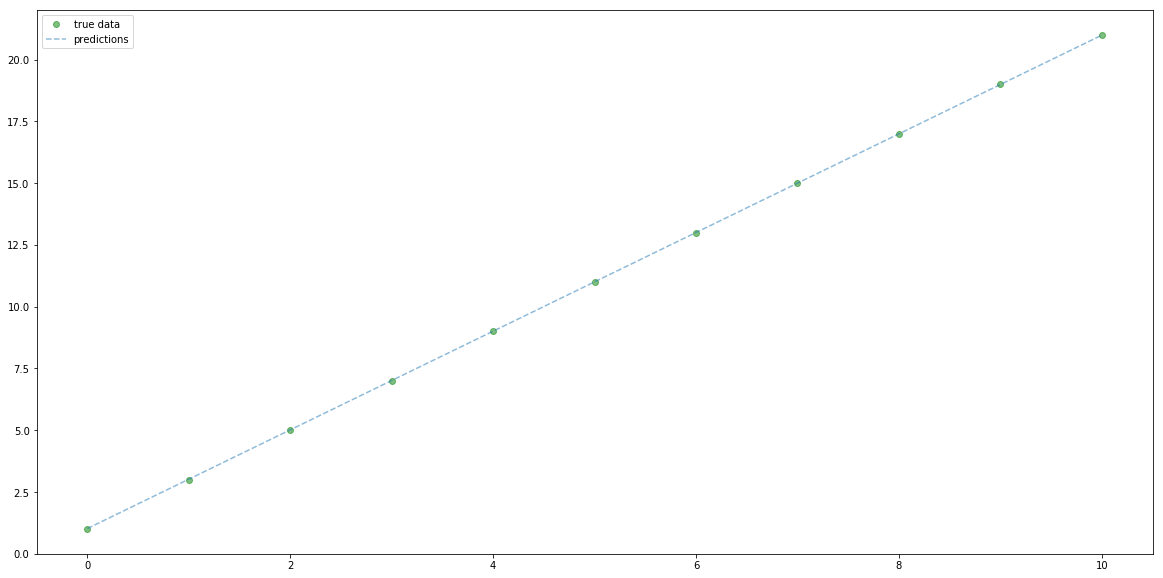

In [18]:
# Plot actual data vs predictions
plt.figure(figsize=(20,10))
plt.clf()

# Plot true data
plt.plot(x_train, y_train, 'go', label='true data', alpha=0.5)

# Plot predicted data
plt.plot(x_train,predictions, '--', label='predictions', alpha=0.5)

plt.legend()

### Save Trained Model

In [19]:
save_model = False

if save_model is True:
    # Save model parameters "alpha" and "beta"
    torch.save(model.state_dict(), './saved_models/linear_regression.pkl')

### Load Trained Model

In [20]:
load_model = False

if load_model is True:
    model.load_state_dict(torch.load('./saved_models/linear_regression.pkl'))